In [ ]:
# https://www.youtube.com/watch?v=ujTCoH21GlA&list=PLzMcBGfZo4-mP7qA9cagf68V06sko5otr
# Machine Learning #1 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv('./data/student-mat.csv', sep = ';')

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

#print(data.head())

predict = 'G3'

x = np.array(data.drop([predict],1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = .1)

# https://www.youtube.com/watch?v=1BYu65vLKdA&list=PLzMcBGfZo4-mP7qA9cagf68V06sko5otr&index=3

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Co: \n', linear.coef_)
print('int: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])



In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Student+Performance

Matplotlib is building the font cache; this may take a moment.
C:\Users\Daddy\AppData\Local\Temp\ipykernel_4976\3226571254.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict],1))


Accuracy: 0.917633346001218
Accuracy: 0.776877295072058
Accuracy: 0.8398305355982242
Accuracy: 0.7996558422672799
Accuracy: 0.8794621680271182
Accuracy: 0.7657017471751602
Accuracy: 0.7633093337416899
Accuracy: 0.8070622803819771
Accuracy: 0.7762002341060172
Accuracy: 0.8663986672018031
Accuracy: 0.8442975937209041
Accuracy: 0.6654445387008165
Accuracy: 0.8125404630591783
Accuracy: 0.9096789310026647
Accuracy: 0.796173718922448
Accuracy: 0.8791996085460768
Accuracy: 0.8907717789074566
Accuracy: 0.8007484302052212
Accuracy: 0.5757036829035487
Accuracy: 0.7852431344622284
-------------------------
Coefficient: 
 [ 0.16888383  0.96914907  0.04054594 -0.33709902 -0.19526199]
Intercept: 
 -1.562597487835113
-------------------------
14.94848812119124 [14 15  0  0  2] 15
9.446885579025007 [ 8 10  4  0  1] 10
-0.7445565124431067 [6 0 0 0 1] 0
7.2322335685779695 [8 8 2 0 2] 8
13.730130997627718 [12 14  7  0  3] 14
13.773862821103572 [13 13 23  0  2] 13
17.224553911001205 [16 17  0  0  2] 17
10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


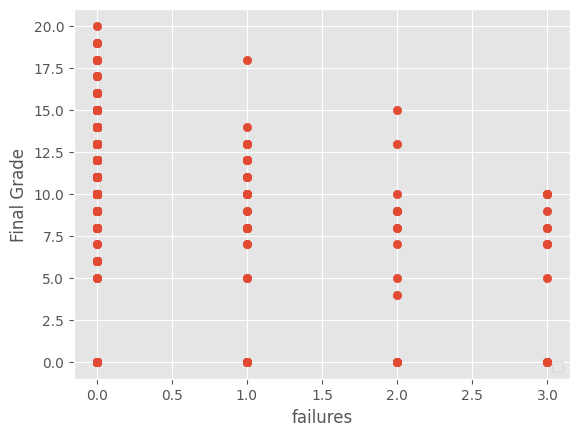

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

data = pd.read_csv('./data/student-mat.csv', sep = ';')

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

#print(data.head())

predict = 'G3'

x = np.array(data.drop([predict],1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = .1)

# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()